In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from ast import literal_eval
import seaborn as sns
import seaborn.objects as so
sns.set_theme()

In [13]:
df = pd.read_parquet('/scratch/tsoares/wikidumps/simplewiki-NS0-20231001/eval/test_data.parquet')
df['language'] = 'simple'
df

,source_title,source_ID,target_title,context,section,mention_present,source_lead,first_version,second_version,direct_match,missing_category,negative_contexts,language
0,Fish,285,Freshwater_fish,Freshwater fish\n41% of all fish live in fresh...,Freshwater fish,True,Fish (plural: fish or fishes) are a group of a...,9132736,9132737,True,None,[{'context': 'They have two sets of paired fin...,simple
1,Fish,285,Saltwater_fish,Saltwater fish\n59% of fish live in saltwater ...,Saltwater fish,True,Fish (plural: fish or fishes) are a group of a...,9132736,9132737,True,None,[{'context': 'The first fish developed about 5...,simple
2,Fish,285,Shark,Related pages\n-Citizendium,Related pages,False,Fish (plural: fish or fishes) are a group of a...,9110845,9132736,True,missing_mention,[{'context': 'Fish (plural: fish or fishes) ar...,simple
3,Geometry,315,Ancient_Greek,Geometry is the part of mathematics that studi...,Lead,False,Geometry is the part of mathematics that studi...,8970088,9105317,True,missing_mention,[{'context': 'Geometry is the part of mathemat...,simple
4,Hydrogen,355,Celsius,Properties\nHydrogen is classed as a reactive ...,Properties,True,Hydrogen is a chemical element found at the be...,9149164,9149805,True,None,[{'context': 'Hydrogen in nature\nIn its pure ...,simple
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Britain%27s_Got_It_Takes_More_Talent,1058409,Simon_Cowell,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161094,9161905,False,missing_sentence,"[{'context': ""Britain’s Got More Talent is spi...",simple
3814,Britain%27s_Got_It_Takes_More_Talent,1058409,Amanda_Holden,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161094,9161905,False,missing_sentence,"[{'context': ""Britain’s Got More Talent is spi...",simple
3815,Britain%27s_Got_It_Takes_More_Talent,1058409,Alesha_Dixon,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161094,9161905,False,missing_sentence,"[{'context': ""Britain’s Got More Talent is spi...",simple
3816,Britain%27s_Got_It_Takes_More_Talent,1058409,Kate_Garraway,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161090,9161094,True,missing_mention,"[{'context': ""Britain’s Got More Talent is spi...",simple


In [14]:
print(f"There are {len(df)} links in the test set.")

There are 3818 links in the test set.


In [15]:
print(f"Of these, it was not possible to extract a context from {len(df[df['context'] == ''])} ({len(df[df['context'] == ''])/len(df)*100:.2f}%) links.")
df = df[df['context'] != '']
print(f"We are left with {len(df)} links.")

Of these, it was not possible to extract a context from 134 (3.51%) links.
We are left with 3684 links.


## Plots

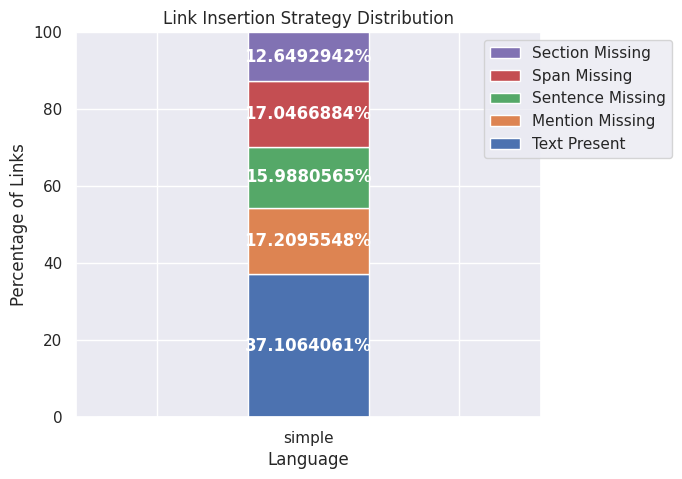

In [20]:
# matplotlib stacked bar plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_title('Link Insertion Strategy Distribution')
ax.set_ylabel('Percentage of Links')
ax.set_xlabel('Language')
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(len(df['language'].unique())+2))
ax.set_xticklabels([''] + df['language'].unique().tolist() + [''], rotation=0)

present_text = [0]
missing_mention = [0]
missing_sentence = [0]
missing_span = [0]
missing_section = [0]

for language in df['language'].unique():
    present_text.append(len(df[(df['language'] == language) & (df['missing_category'].isna())]) / len(df[df['language'] == language]) * 100)
    missing_mention.append(len(df[(df['language'] == language) & (df['missing_category'] == 'missing_mention')]) / len(df[df['language'] == language]) * 100)
    missing_sentence.append(len(df[(df['language'] == language) & (df['missing_category'] == 'missing_sentence')]) / len(df[df['language'] == language]) * 100)
    missing_span.append(len(df[(df['language'] == language) & (df['missing_category'] == 'missing_span')]) / len(df[df['language'] == language]) * 100)
    missing_section.append(len(df[(df['language'] == language) & (df['missing_category'] == 'missing_section')]) / len(df[df['language'] == language]) * 100)

present_text.append(0)
missing_mention.append(0)
missing_sentence.append(0)
missing_span.append(0)
missing_section.append(0)
    
bottom = np.zeros(len(df['language'].unique())+2)
present_text = np.array(present_text)
missing_mention = np.array(missing_mention)
missing_sentence = np.array(missing_sentence)
missing_span = np.array(missing_span)
missing_section = np.array(missing_section)

ax.bar(np.arange(len(df['language'].unique())+2), present_text, label='Text Present', bottom=bottom)
bottom += present_text
ax.bar(np.arange(len(df['language'].unique())+2), missing_mention, label='Mention Missing', bottom=bottom)
bottom += missing_mention
ax.bar(np.arange(len(df['language'].unique())+2), missing_sentence, label='Sentence Missing', bottom=bottom)
bottom += missing_sentence
ax.bar(np.arange(len(df['language'].unique())+2), missing_span, label='Span Missing', bottom=bottom)
bottom += missing_span
ax.bar(np.arange(len(df['language'].unique())+2), missing_section, label='Section Missing', bottom=bottom)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
# flip order of legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right', bbox_to_anchor=(1.3, 1.0))

# add labels inside each bar
for i, v in enumerate(present_text):
    if v > 0:
        ax.text(i, v/2, f'{v:.7f}%', color='white', ha='center', va='center', fontweight='bold')
for i, v in enumerate(missing_mention):
    if v > 0:
        ax.text(i, present_text[i]+v/2, f'{v:.7f}%', color='white', ha='center', va='center', fontweight='bold')
for i, v in enumerate(missing_sentence):
    if v > 0:
        ax.text(i, present_text[i]+missing_mention[i]+v/2, f'{v:.7f}%', color='white', ha='center', va='center', fontweight='bold')
for i, v in enumerate(missing_span):
    if v > 0:
        ax.text(i, present_text[i]+missing_mention[i]+missing_sentence[i]+v/2, f'{v:.7f}%', color='white', ha='center', va='center', fontweight='bold')
for i, v in enumerate(missing_section):
    if v > 0:
        ax.text(i, present_text[i]+missing_mention[i]+missing_sentence[i]+missing_span[i]+v/2, f'{v:.7f}%', color='white', ha='center', va='center', fontweight='bold')

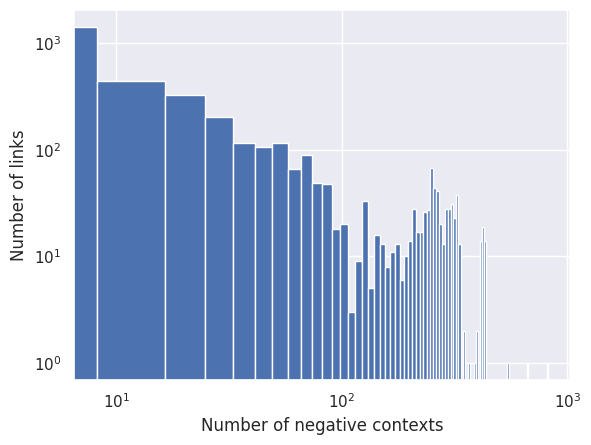

In [17]:
# plot a histogram with the number of negative contexts per link
negative_contexts = df[df['context'] != '']['negative_contexts'].reset_index(drop=True).apply(literal_eval).apply(len)
negative_contexts.hist(bins=100)
# set log x axis
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of negative contexts')
plt.ylabel('Number of links')
plt.show()

In [18]:
negative_contexts.describe()

count    3684.000000
mean       62.230727
std        99.728752
min         0.000000
25%         3.000000
50%        16.000000
75%        60.000000
max       820.000000
Name: negative_contexts, dtype: float64

# Analyze processing failures

In [47]:
import urllib
def process_title(title):
    return urllib.parse.unquote(title).replace('_', ' ')

def update_targets(target_name, redirect_map):
    counter = 0
    while target_name in redirect_map:
        target_name = redirect_map[target_name]
        counter += 1
        if counter > 10:
            break
    return target_name

In [48]:
df_1 = pd.concat([pd.read_parquet(f'/scratch/tsoares/wikidumps/simplewiki-NS0-20231001/processed_data/good_links_{i}.parquet') for i in range(2)]).reset_index(drop=True)
df_2 = pd.concat([pd.read_parquet(f'/scratch/tsoares/wikidumps/simplewiki-NS0-20231101/processed_data/good_links_{i}.parquet') for i in range(2)]).reset_index(drop=True)
# df_pages_1 = pd.concat([pd.read_parquet(f'/scratch/tsoares/wikidumps/simplewiki-NS0-20231001/processed_data/good_pages_{i}.parquet') for i in range(2)]).reset_index(drop=True)

In [100]:
redirect_map = pd.concat([pd.read_parquet(f'/scratch/tsoares/wikidumps/simplewiki-NS0-2023{month}01/processed_data/redirect_map.parquet') for month in [10, 11]]).reset_index(drop=True)
redirect_map = redirect_map['redirect'].to_dict()

df_1['target_title'] = df_1['target_title'].apply(
    lambda x: update_targets(x, redirect_map))
df_2['target_title'] = df_2['target_title'].apply(
    lambda x: update_targets(x, redirect_map))

df_1 = df_1[['source_title', 'target_title',
                'source_ID', 'target_ID', 'source_version']]
df_2 = df_2[['source_title', 'target_title',
                'source_ID', 'target_ID', 'source_version']]

# group the links by source and target and count the number of links
df_1 = df_1.groupby(['source_title', 'target_title', 'source_ID',
                    'target_ID', 'source_version']).size().reset_index(name='count')
df_2 = df_2.groupby(['source_title', 'target_title', 'source_ID',
                    'target_ID', 'source_version']).size().reset_index(name='count')

# find all new links added in df_2. Consider two cases
# 1. The row is not present in df_1
# 2. The row is present in df_1 but the count is smaller in df_1
df_diff = df_2.merge(df_1, how='left', on=[
                    'source_title', 'target_title', 'source_ID', 'target_ID'], suffixes=('_2', '_1'))
df_diff = df_diff[(df_diff['count_1'].isna()) | (df_diff['count_2'] > df_diff['count_1'])]
df_diff['count_1'] = df_diff['count_1'].fillna(0)
# df_diff['source_version_1'] = df_diff['source_version_1'].fillna('&oldid=0')
df_diff['count'] = df_diff['count_2'] - df_diff['count_1']
df_diff = df_diff[['source_title', 'target_title', 'source_ID',
                'target_ID', 'source_version_1', 'source_version_2', 'count']]


initial_size = df_diff['count'].sum()
print(f'Initially, there are {df_diff["count"].sum()} new candidate links, from {len(df_diff)} unique src-tgt pairs.')

Initially, there are 18455.0 new candidate links, from 18455 unique src-tgt pairs.


In [101]:
df_diff

,source_title,target_title,source_ID,target_ID,source_version_1,source_version_2,count
367,%C2%A1Mucha_Lucha%21%3A_Gigante,Sweden,566381,2136,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
714,%C3%81ngel_Mar%C3%ADa_Villar,Spaniards,682478,340635,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
952,%C3%84lghult,Sweden,480121,2136,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
958,%C3%84lmhult,Sweden,426745,2136,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
963,%C3%84lmhult_Municipality,Sweden,411696,2136,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
...,...,...,...,...,...,...,...
2288823,Zupee_%28Ludo%29,IIT,1054065,117041,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
2288824,Zupee_%28Ludo%29,Indian_Institutes_of_Technology,1054065,978515,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
2288825,Zupee_%28Ludo%29,Kapil_Sharma,1054065,841865,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0
2288826,Zupee_%28Ludo%29,Ludo,1054065,966190,NaN,https://simple.wikipedia.org/w/index.php?title...,1.0


In [64]:
df_diff['source_ID'] = df_diff['source_ID'].astype(int)

In [65]:
# compare links in df with links in df_diff
# find links with source title in df_diff and not in df
df_diff['source_title'] = df_diff['source_title'].apply(process_title)
df['source_title'] = df['source_title'].apply(process_title)
df_diff_2 = df_diff.merge(df[['source_title', 'source_ID']].drop_duplicates(), how='left', on='source_title', suffixes=('_diff', '_df'))
df_diff_2 = df_diff_2[df_diff_2['source_ID_df'].isna()]
df_diff_2 = df_diff_2[['source_title', 'target_title', 'source_ID_diff', 'target_ID', 'source_version_1', 'source_version_2', 'count']]
df_diff_2['source_ID'] = df_diff_2['source_ID_diff']
df_diff_2 = df_diff_2.drop(columns=['source_ID_diff'])
df_diff_2 = df_diff_2.rename(columns={'source_ID': 'source_ID_diff'})
df_diff_2['source_ID_diff'] = df_diff_2['source_ID_diff'].astype(int)
# df_diff['source_version_1'] = df_diff['source_version_1'].apply(lambda x: x.replace('&oldid=', ''))
# df_diff['source_version_1'] = df_diff['source_version_1'].astype(int)
# df_diff['source_version_2'] = df_diff['source_version_2'].apply(lambda x: x.replace('&oldid=', ''))
# df_diff['source_version_2'] = df_diff['source_version_2'].astype(int)
df_diff_2['count'] = df_diff_2['count'].astype(int)
df_diff_2 = df_diff_2.sort_values(by=['source_ID_diff', 'target_ID', 'source_version_1', 'source_version_2']).reset_index(drop=True)
df_diff_2

/tmp/ipykernel_2397593/2172058919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_title'] = df['source_title'].apply(process_title)


,source_title,target_title,target_ID,source_version_1,source_version_2,count,source_ID_diff
0,April,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1
1,Astronomy,Lithium,3735,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,48
2,Boot,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,70
3,Chemistry,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,108
4,Cuba,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,178
...,...,...,...,...,...,...,...
14409,Mackenyu,Hepburn_romanization,700691,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058838
14410,Aleksandr Li,2000_Summer_Olympics,42851,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058844
14411,Aleksandr Li,Archery,55000,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058844
14412,Sergey Martynov,1996_Summer_Olympics,47885,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058845


In [66]:
df_diff[df_diff['source_version_1'] != '&oldid=0']

,source_title,target_title,source_ID,target_ID,source_version_1,source_version_2,count


In [71]:
# compare links in df with links in df_diff
# find links with target title in df_diff and not in df
df_diff_3 = df_diff.merge(df[['target_title']].drop_duplicates(), how='left', on='target_title', suffixes=('_diff', '_df'))
df_diff_3 = df_diff_3[['source_title', 'target_title', 'source_ID', 'source_version_1', 'source_version_2', 'count']]
# df_diff['source_version_1'] = df_diff['source_version_1'].apply(lambda x: x.replace('&oldid=', ''))
# df_diff['source_version_1'] = df_diff['source_version_1'].astype(int)
# df_diff['source_version_2'] = df_diff['source_version_2'].apply(lambda x: x.replace('&oldid=', ''))
# df_diff['source_version_2'] = df_diff['source_version_2'].astype(int)
df_diff_3['count'] = df_diff_3['count'].astype(int)
df_diff_3 = df_diff_3.sort_values(by=['source_ID', 'source_version_1', 'source_version_2']).reset_index(drop=True)
df_diff_3

,source_title,target_title,source_ID,source_version_1,source_version_2,count
0,April,Sweden,1,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
1,Astronomy,Lithium,48,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
2,Boot,Sweden,70,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
3,Chemistry,Sweden,108,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
4,Cuba,Sweden,178,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
...,...,...,...,...,...,...
18450,Mackenyu,Sonny_Chiba,1058838,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
18451,Aleksandr Li,2000_Summer_Olympics,1058844,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
18452,Aleksandr Li,Archery,1058844,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1
18453,Sergey Martynov,1996_Summer_Olympics,1058845,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1


In [72]:
df_diff_3[df_diff_3['source_version_1'] != '&oldid=0']

,source_title,target_title,source_ID,source_version_1,source_version_2,count


In [73]:
# compare links in df with links in df_diff
# find links with target title and source title in df_diff and not in df
df_diff_4 = df_diff.merge(df[['source_title', 'target_title', 'source_ID']].drop_duplicates(), how='left', on=['source_title', 'target_title'], suffixes=('_diff', '_df'))
df_diff_4 = df_diff_4[df_diff_4['source_ID_df'].isna()]
df_diff_4 = df_diff_4[['source_title', 'target_title', 'source_ID_diff', 'target_ID', 'source_version_1', 'source_version_2', 'count']]
df_diff_4['source_ID'] = df_diff_4['source_ID_diff']
df_diff_4 = df_diff_4.drop(columns=['source_ID_diff'])
df_diff_4 = df_diff_4.rename(columns={'source_ID': 'source_ID_diff'})
df_diff_4['source_ID_diff'] = df_diff_4['source_ID_diff'].astype(int)
# df_diff['source_version_1'] = df_diff['source_version_1'].apply(lambda x: x.replace('&oldid=', ''))
# df_diff['source_version_1'] = df_diff['source_version_1'].astype(int)
# df_diff['source_version_2'] = df_diff['source_version_2'].apply(lambda x: x.replace('&oldid=', ''))
# df_diff['source_version_2'] = df_diff['source_version_2'].astype(int)
df_diff_4['count'] = df_diff_4['count'].astype(int)
df_diff_4 = df_diff_4.sort_values(by=['source_ID_diff', 'target_ID', 'source_version_1', 'source_version_2']).reset_index(drop=True)
df_diff_4

,source_title,target_title,target_ID,source_version_1,source_version_2,count,source_ID_diff
0,April,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1
1,Astronomy,Lithium,3735,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,48
2,Boot,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,70
3,Chemistry,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,108
4,Cuba,Sweden,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,178
...,...,...,...,...,...,...,...
15936,Mackenyu,Hepburn_romanization,700691,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058838
15937,Aleksandr Li,2000_Summer_Olympics,42851,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058844
15938,Aleksandr Li,Archery,55000,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058844
15939,Sergey Martynov,1996_Summer_Olympics,47885,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1,1058845


In [74]:
df_diff_4[df_diff_4['source_version_1'] != '&oldid=0']

,source_title,target_title,target_ID,source_version_1,source_version_2,count,source_ID_diff


In [78]:
df_diff.sample(10)

,source_title,target_title,source_ID,target_ID,source_version_1,source_version_2,count
1872783,Santarém District,Districts_of_Portugal,1058258,910454,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111306,Acanthopterygii,Pufferfish,964819,304687,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
349867,Björn Borg,Sweden,118685,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
807524,Freddie Wadling,Sweden,544517,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
1960474,Soilwork,Sweden,102571,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
243112,Asaph Hall,Astronomer,1057889,4491,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
84281,2023 Israel–Hamas war,Drinking_water,1052901,7082,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
2200544,Virtual Boy Wario Land,Wario,1035688,89790,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
1253922,Linköping Arena,Sweden,520581,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
1939533,Siewert Öholm,Sweden,569113,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0


In [76]:
df

,source_title,source_ID,target_title,context,section,mention_present,source_lead,first_version,second_version,direct_match,missing_category,negative_contexts,language
0,Fish,285,Freshwater_fish,Freshwater fish\n41% of all fish live in fresh...,Freshwater fish,True,Fish (plural: fish or fishes) are a group of a...,9132736,9132737,True,None,[{'context': 'They have two sets of paired fin...,simple
1,Fish,285,Saltwater_fish,Saltwater fish\n59% of fish live in saltwater ...,Saltwater fish,True,Fish (plural: fish or fishes) are a group of a...,9132736,9132737,True,None,[{'context': 'The first fish developed about 5...,simple
2,Fish,285,Shark,Related pages\n-Citizendium,Related pages,False,Fish (plural: fish or fishes) are a group of a...,9110845,9132736,True,missing_mention,[{'context': 'Fish (plural: fish or fishes) ar...,simple
3,Geometry,315,Ancient_Greek,Geometry is the part of mathematics that studi...,Lead,False,Geometry is the part of mathematics that studi...,8970088,9105317,True,missing_mention,[{'context': 'Geometry is the part of mathemat...,simple
4,Hydrogen,355,Celsius,Properties\nHydrogen is classed as a reactive ...,Properties,True,Hydrogen is a chemical element found at the be...,9149164,9149805,True,None,[{'context': 'Hydrogen in nature\nIn its pure ...,simple
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Britain's Got It Takes More Talent,1058409,Simon_Cowell,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161094,9161905,False,missing_sentence,"[{'context': ""Britain’s Got More Talent is spi...",simple
3814,Britain's Got It Takes More Talent,1058409,Amanda_Holden,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161094,9161905,False,missing_sentence,"[{'context': ""Britain’s Got More Talent is spi...",simple
3815,Britain's Got It Takes More Talent,1058409,Alesha_Dixon,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161094,9161905,False,missing_sentence,"[{'context': ""Britain’s Got More Talent is spi...",simple
3816,Britain's Got It Takes More Talent,1058409,Kate_Garraway,Britain’s Got More Talent is spin-off based of...,Lead,False,Britain’s Got More Talent is spin-off based of...,9161090,9161094,True,missing_mention,"[{'context': ""Britain’s Got More Talent is spi...",simple


In [80]:
df[df['source_title'] == 'Acanthopterygii']

,source_title,source_ID,target_title,context,section,mention_present,source_lead,first_version,second_version,direct_match,missing_category,negative_contexts,language
2464,Acanthopterygii,964819,Percomorpha,Taxonomy\nThe superorder Acanthopterygii conta...,Taxonomy,True,"Acanthopterygii (meaning ""spiny-finned one"" ) ...",9141508,9150968,True,None,"[{'context': 'Acanthopterygii (meaning ""spiny-...",simple
2465,Acanthopterygii,964819,Istiophoriformes,"Order Atheriniformes, including silversides an...",Taxonomy,True,"Acanthopterygii (meaning ""spiny-finned one"" ) ...",9141508,9150968,True,None,"[{'context': 'Acanthopterygii (meaning ""spiny-...",simple


In [95]:
df_diff[df_diff['source_title'] == 'Acanthopterygii']

,source_title,target_title,source_ID,target_ID,source_version_1,source_version_2,count
111295,Acanthopterygii,Acanthuriformes,964819,982884,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111297,Acanthopterygii,Anglerfish,964819,180711,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111298,Acanthopterygii,Atheriniformes,964819,998150,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111299,Acanthopterygii,Flatfish,964819,26396,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111300,Acanthopterygii,Istiophoriformes,964819,982890,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111301,Acanthopterygii,Labriformes,964819,990855,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111302,Acanthopterygii,Mullet,964819,135206,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111303,Acanthopterygii,Ovalentaria,964819,984194,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111304,Acanthopterygii,Perciformes,964819,277988,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
111305,Acanthopterygii,Percomorpha,964819,992503,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0


In [106]:
df_versions = pd.read_parquet('/scratch/tsoares/wikidumps/simplewiki-NS0-20231001/eval/link_versions.parquet')
df_versions

,source_title,target_title,source_ID,target_ID,first_version,second_version
0,Fish,Freshwater_fish,285,673845,9132736,9132737
1,Fish,Saltwater_fish,285,987349,9132736,9132737
2,Fish,Shark,285,9067,9110845,9132736
3,Geometry,Ancient_Greek,315,16174,8970088,9105317
4,Hydrogen,Celsius,355,14808,9149164,9149805
...,...,...,...,...,...,...
4204,Britain%27s_Got_It_Takes_More_Talent,Ant_McPartlin,1058409,837515,9160877,9160881
4205,Britain%27s_Got_It_Takes_More_Talent,David_Hasselhoff,1058409,358001,9160877,9160881
4206,Britain%27s_Got_It_Takes_More_Talent,David_Walliams,1058409,307993,9160877,9160881
4207,Britain%27s_Got_It_Takes_More_Talent,Piers_Morgan,1058409,285069,9160877,9160881


In [105]:
df_versions[df_versions['source_title'] == 'Acanthopterygii']

,source_title,target_title,source_ID,target_ID,first_version,second_version
2691,Acanthopterygii,Istiophoriformes,964819,982890,9141508,9150968
2692,Acanthopterygii,Percomorpha,964819,992503,9141508,9150968


In [94]:
#print df_diff sorted by source_ID
# df_diff[df_diff['source_version_1']  != '&oldid=0'].sort_values(by=['source_ID']).reset_index(drop=True)
df_diff.sort_values(by=['source_ID']).reset_index(drop=True)

,source_title,target_title,source_ID,target_ID,source_version_1,source_version_2,count
0,April,Sweden,1,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
1,Astronomy,Lithium,48,3735,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
2,Boot,Sweden,70,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
3,Chemistry,Sweden,108,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
4,Cuba,Sweden,178,2136,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
...,...,...,...,...,...,...,...
18450,Mackenyu,California,1058838,3009,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
18451,Aleksandr Li,Archery,1058844,55000,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
18452,Aleksandr Li,2000_Summer_Olympics,1058844,42851,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
18453,Sergey Martynov,Archery,1058845,55000,&oldid=0,https://simple.wikipedia.org/w/index.php?title...,1.0
